<a href="https://colab.research.google.com/github/kumarianni/Stream_energy/blob/main/Smartenergy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025-07-31 06:30:13.206 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.267 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-31 06:30:13.267 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 06:30:13.278 Thread 'MainThread': mi

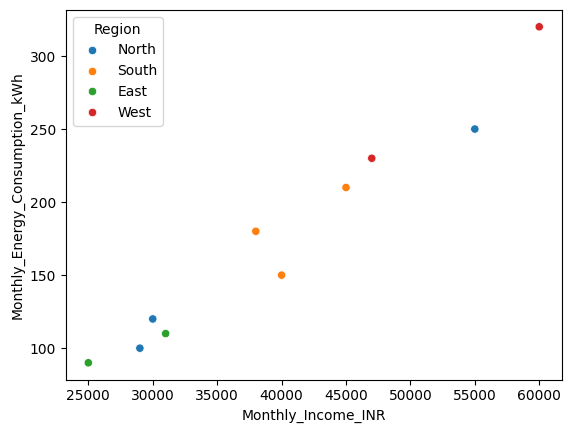

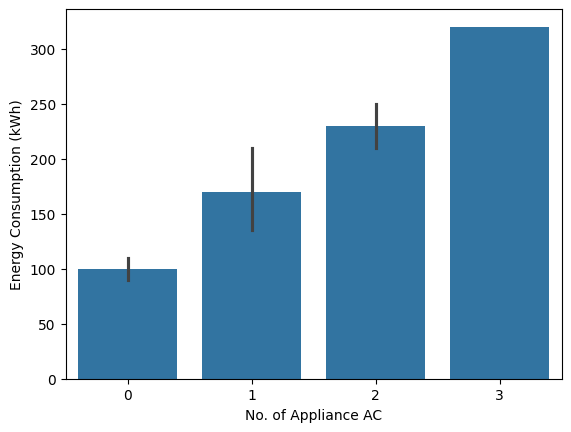

In [ ]:

# import all the libraries

import streamlit as st  # Frontend framework for building web apps
import pandas as pd     # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization

# Step 1: Load dataset
# Load dataset
df = pd.read_csv("/content/energy_data_india_coYOUOMGWA.csv")

st.title("Energy Dashboard for Housing Complex")

# Step 2: Create Sidebar Filters
# Sidebar Filters
region = st.sidebar.selectbox("Select Region", ["All"] + sorted(df["Region"].unique().tolist()))

if region != "All":
    df = df[df["Region"] == region]

st.subheader(" Household Energy Consumption Overview")
st.write(df.head())

# Step 3: Metrics
avg_energy = df["Monthly_Energy_Consumption_kWh"].mean()
total_energy = df["Monthly_Energy_Consumption_kWh"].sum()
st.metric("Average Monthly Consumption (kWh)", f"{avg_energy:.2f}")
st.metric("Total Energy Consumption (kWh)", f"{total_energy:.0f}")

# Step 4: Visualizations
# Energy vs Income
st.subheader(" Income vs Energy Consumption")
fig1, ax1 = plt.subplots()
sns.scatterplot(data=df, x="Monthly_Income_INR", y="Monthly_Energy_Consumption_kWh", hue="Region", ax=ax1)
st.pyplot(fig1)

# Appliance Contribution
st.subheader(" Appliance-wise Count vs Energy Consumption")
appliances = ["Appliance_AC", "Appliance_Fan", "Appliance_Light", "Fridge", "Washing_Machine", "EV_Charging"]
selected_appliance = st.selectbox("Select Appliance", appliances)
fig2, ax2 = plt.subplots()
sns.barplot(x=df[selected_appliance], y=df["Monthly_Energy_Consumption_kWh"], ax=ax2)
ax2.set_xlabel(f"No. of {selected_appliance.replace('_', ' ')}")
ax2.set_ylabel("Energy Consumption (kWh)")
st.pyplot(fig2)

# Step 5: Recommendations
st.subheader(" Smart Recommendations")
for _, row in df.iterrows():
    if row["Monthly_Energy_Consumption_kWh"] > 250:
        st.warning(f"Household ID {row['Household_ID']} - High usage! Recommend switching to solar and LED bulbs.")
    elif row["EV_Charging"] == 1:
        st.info(f"Household ID {row['Household_ID']} - Consider installing a separate EV meter for optimal billing.")

# Step 6: Download Recommendations
# For Candidates Create a download link for the recommendations
recommendations = []
for _, row in df.iterrows():
    if row["Monthly_Energy_Consumption_kWh"] > 250:
        recommendations.append(f"Household ID {row['Household_ID']} - High usage! Recommend switching to solar and LED bulbs.")
    elif row["EV_Charging"] == 1:
        recommendations.append(f"Household ID {row['Household_ID']} - Consider installing a separate EV meter for optimal billing.")

if recommendations:
    st.download_button("Download Recommendations", "\n".join(recommendations), "recommendations.txt")

# Step 7: Conclusion to be added by Candidates
# Candidates can add More :: CSS, Graphs, ML models




In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


2025-07-31 10:24:12.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 10:24:12.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

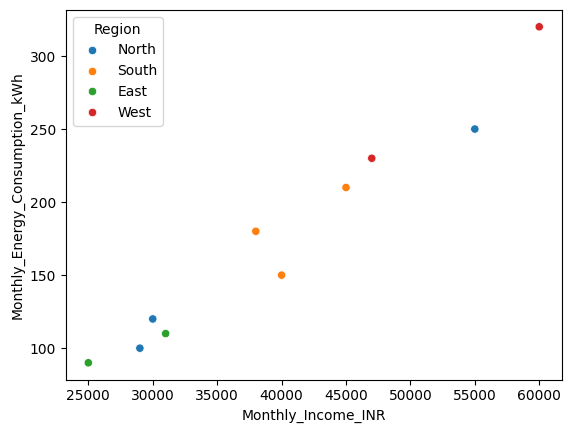

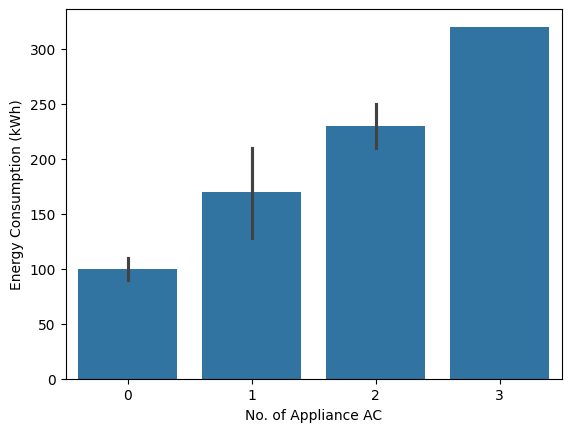

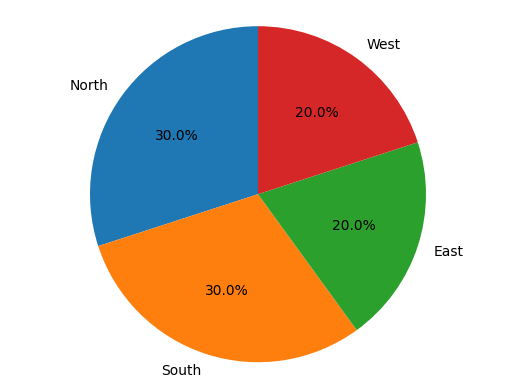

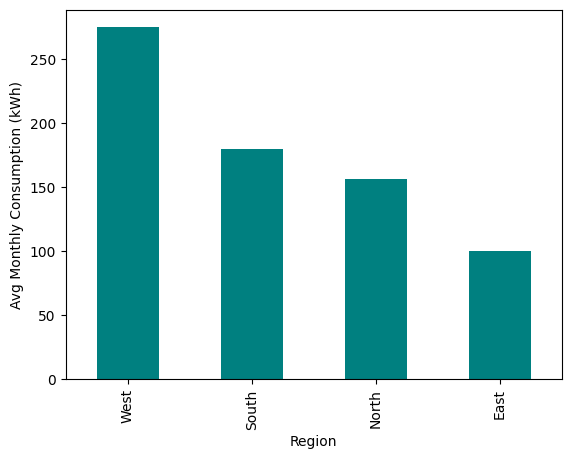

In [7]:
# Smart Energy Consumption Dashboard

# 1. Import all the required libraries
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Streamlit page setup
st.set_page_config(page_title="/content/smart_energy_dashboard.py", layout="wide")

# 3. Custom CSS for UI
st.markdown("""
<style>
    body {
        background-color: #f5f5f5;
    }
    .main {
        background-color: #ffffff;
        padding: 2rem;
        border-radius: 10px;
    }
    div[data-testid="metric-container"] {
        background-color: #E8F6F3;
        padding: 15px;
        border-radius: 10px;
        margin: 10px 0px;
        box-shadow: 0 0 10px rgba(0,0,0,0.05);
    }
    section[data-testid="stSidebar"] {
        background-color: #D6EAF8;
    }
</style>
""", unsafe_allow_html=True)

# 4. Load Dataset
df = pd.read_csv("energy_data_india_coYOUOMGWA.csv")

# 5. Title
st.title("⚡ Smart Energy Consumption Dashboard")

# 6. Sidebar Filters
st.sidebar.header("🔍 Filter Options")
region = st.sidebar.selectbox("Select Region", ["All"] + sorted(df["Region"].unique().tolist()))
if region != "All":
    df = df[df["Region"] == region]

# 7. Show Data
st.subheader("📋 Household Energy Consumption Overview")
st.write(df.head())

# 8. Key Metrics
avg_energy = df["Monthly_Energy_Consumption_kWh"].mean()
total_energy = df["Monthly_Energy_Consumption_kWh"].sum()

col1, col2 = st.columns(2)
col1.metric("Average Monthly Consumption (kWh)", f"{avg_energy:.2f}")
col2.metric("Total Energy Consumption (kWh)", f"{total_energy:.0f}")

# 9. Scatter Plot: Income vs Energy Consumption
st.subheader("📈 Income vs Energy Consumption")
fig1, ax1 = plt.subplots()
sns.scatterplot(data=df, x="Monthly_Income_INR", y="Monthly_Energy_Consumption_kWh", hue="Region", ax=ax1)
st.pyplot(fig1)

# 10. Bar Chart: Appliance vs Energy Consumption
st.subheader("🔌 Appliance Count vs Energy Consumption")
appliances = ["Appliance_AC", "Appliance_Fan", "Appliance_Light", "Fridge", "Washing_Machine", "EV_Charging"]
selected_appliance = st.selectbox("Select Appliance", appliances)
fig2, ax2 = plt.subplots()
sns.barplot(x=df[selected_appliance], y=df["Monthly_Energy_Consumption_kWh"], ax=ax2)
ax2.set_xlabel(f"No. of {selected_appliance.replace('_', ' ')}")
ax2.set_ylabel("Energy Consumption (kWh)")
st.pyplot(fig2)

# 11. Pie Chart: Region-wise household distribution
st.subheader("📊 Household Distribution by Region")
region_counts = df["Region"].value_counts()
fig3, ax3 = plt.subplots()
ax3.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
ax3.axis("equal")
st.pyplot(fig3)

# 12. Bar Chart: Average consumption by region
st.subheader("🌍 Average Energy Consumption by Region")
region_avg = df.groupby("Region")["Monthly_Energy_Consumption_kWh"].mean().sort_values(ascending=False)
fig4, ax4 = plt.subplots()
region_avg.plot(kind='bar', color='teal', ax=ax4)
ax4.set_ylabel("Avg Monthly Consumption (kWh)")
st.pyplot(fig4)

# 13. Recommendations
st.subheader("💡 Smart Recommendations")
recommendations = []

for _, row in df.iterrows():
    if row["Monthly_Energy_Consumption_kWh"] > 250:
        message = f"Household ID {row['Household_ID']} - ⚠ High usage! Recommend switching to solar and LED bulbs."
        recommendations.append(message)
        st.warning(message)
    elif row["EV_Charging"] == 1:
        message = f"Household ID {row['Household_ID']} - 🚗 Consider installing a separate EV meter for optimal billing."
        recommendations.append(message)
        st.info(message)

# 14. Download Recommendations
if recommendations:
    st.download_button(
        label="📥 Download Recommendations",
        data="\n".join(recommendations),
        file_name="recommendations.txt",
        mime="text/plain"
    )

# 15. Footer
st.markdown("---")
st.markdown("<p style='text-align:center;'>🚀 Built with ❤ using Streamlit | <a href='https://github.com/yourusername/your-repo' target='_blank'>GitHub Repo</a></p>", unsafe_allow_html=True)